In [25]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab as p
import os
from scipy import integrate
import copy
from joblib import Parallel, delayed
from time import time
from math import pi
import shutil
from datetime import datetime

In [43]:
###########
###plots###
###########

def plot_pop_volume_life(pop, xlab, ylab, save_name, int_1, int_2, save_dir):
    
    font = {'size'   : 14}
    matplotlib.rc('font', **font)

    logit = True
    f1 = p.figure()
    tmp=[]
    
    X = 'r'
    #zahl=2000
    #tmp2=zeros((zahl,zahl),dtype=float)

    zahl = max([len(cell.species_growth_m[X]) for cell in pop]) # "zahl" is the simulation time of the oldest cell
    nr_cells=len(pop)
    tmp2=np.zeros((nr_cells,zahl),dtype=float)   #2D array with one array of length(zahl) for every cell

    tmp_mn=[]
    tmp_sd=[]
    i=1
    for k1, cell in enumerate(pop):
        if np.any(cell.species_growth_m[X]):
            #assemble results of species X for cell number k1
            for k2, m, d in zip(range(zahl-len(cell.species_growth_m[X]),zahl),cell.species_growth_m[X],cell.species_growth_d[X]):
                tmp2[k1,k2] = 4/3*pi*(m**3 + d**3)
            #plot in range between int_1 and int_2, check if log scale should be used
            if not logit and len(cell.species_growth_m[X])>=int_1 and i <= int_2:
                p.plot(range(zahl-len(cell.species_growth_m[X]),zahl),cell.species_growth_m[X], alpha=0.1)
                i += 1
            elif len(cell.species_growth_m[X])>=int_1 and i <= int_2:
                p.plot(range(zahl-len(cell.species_growth_m[X]),zahl),np.log10(cell.species_growth_m[X]), alpha=0.1) #log-scale
                #p.xlim(400,600)
                i += 1
    #for every timestep calculate mean and standard deviation of all cells living at that time
    for m in range(zahl):
        if not logit: tmp_list=[n for n in tmp2[:,m] if n!=0]
        else: tmp_list=[np.log10(n) for n in tmp2[:,m] if n!=0] #log-scale
        tmp_mn.append(np.mean(tmp_list))
        tmp_sd.append(np.std(tmp_list))
    tmp_mn=np.array(tmp_mn)
    tmp_sd=np.array(tmp_sd)
    print (tmp_mn[-1], tmp_sd[-1])

    p.text(50,1,'%s size %s var'%(round(tmp_mn[-1],2),round(tmp_sd[-1],2)) )

    x_values = [i*1 for i in range(zahl-len(tmp_mn),zahl)]

    p1,=p.plot(x_values, tmp_mn, color='#25597c',lw=3)
    p.fill_between(x_values, tmp_mn-tmp_sd, tmp_mn+tmp_sd, color='#82bcd3', alpha=1 )

    p.plot(x_values, tmp_mn-tmp_sd, color='black',lw=0.3)  # plot black line along standart deviation lower end
    p.plot(x_values, tmp_mn+tmp_sd, color='black',lw=0.3)  # plot black line along standart deviation upper end

    r = p.Rectangle((0, 0), .2, .2,facecolor='#82bcd3', alpha=1,edgecolor='black',lw=0.3) # creates rectangle patch for legend use.

    p.legend([p1,r],('Mean','Standard deviation'),loc='lower right',shadow=True)

    p.yticks([np.log10(q) for q in np.linspace(10,250,7)],np.linspace(10,250,7))

    p.xlabel(xlab)
    p.ylabel(ylab)
    #p.title('linear')
    f1.savefig(save_dir + save_name)
    
def plot_X_cyclins_life(pop, X, xlab, ylab, save_name, int_1, int_2, meansd):

    font = {'size'   : 14}
    matplotlib.rc('font', **font)

    logit = True
    f1 = p.figure()
    tmp=[]

    #zahl=2000
    #tmp2=zeros((zahl,zahl),dtype=float)

    zahl = max([len(cell.species_growth_m[X]) for cell in pop]) # "zahl" is the simulation time of the oldest cell
    nr_cells=len(pop)
    tmp2=np.zeros((nr_cells,zahl),dtype=float)

    tmp_mn=[]
    tmp_sd=[]
    i=1
    for k1, cell in enumerate(pop):
        if np.any(cell.species_cyclins[X]):
          if meansd:
            tmp.append(cell.species_cyclins[X])
          else:
            #p.plot(range(len(vector[X])),vector[X])
            for k2, v in zip(range(zahl-len(cell.species_cyclins[X]),zahl),cell.species_cyclins[X]):
              tmp2[k1,k2] = v
            if not logit and len(cell.species_cyclins[X])>=int_1 and i <= int_2:
              p.plot(range(zahl-len(cell.species_cyclins[X]),zahl),cell.species_cyclins[X], alpha=0.1)
              i += 1
            elif len(cell.species_cyclins[X])>=int_1 and i <= int_2:
              p.plot(range(zahl-len(cell.species_cyclins[X]),zahl),np.log10(cell.species_cyclins[X]), alpha=0.1) #log-scale
              #p.xlim(400,600)
              i += 1
    for m in range(zahl):
        if not logit: tmp_list=[n for n in tmp2[:,m] if n!=0]
    else: tmp_list=[np.log10(n) for n in tmp2[:,m] if n!=0] #log-scale
    tmp_mn.append(np.mean(tmp_list))
    tmp_sd.append(np.std(tmp_list))
    tmp_mn=np.array(tmp_mn)
    tmp_sd=np.array(tmp_sd)
    print (tmp_mn[-1], tmp_sd[-1])

    p.text(50,1,'%s size %s var'%(round(tmp_mn[-1],2),round(tmp_sd[-1],2)) )

    x_values = [i*1 for i in range(zahl-len(tmp_mn),zahl)]

    p1,=p.plot(x_values, tmp_mn, color='#25597c',lw=3)
    p.fill_between(x_values, tmp_mn-tmp_sd, tmp_mn+tmp_sd, color='#82bcd3', alpha=1 )

    p.plot(x_values, tmp_mn-tmp_sd, color='black',lw=0.3)  # plot black line along standart deviation lower end
    p.plot(x_values, tmp_mn+tmp_sd, color='black',lw=0.3)  # plot black line along standart deviation upper end

    r = p.Rectangle((0, 0), 1, 1,facecolor='#82bcd3', alpha=1,edgecolor='black',lw=0.3) # creates rectangle patch for legend use.

    p.legend([p1,r],('Mean','Standard deviation'),loc='upper left',shadow=True)

    p.yticks([np.log10(q) for q in np.linspace(10,250,7)],np.linspace(10,250,7))

    if meansd:
        tmp=[i[:int_1] for i in tmp] # alle gleich gross
    mn=np.mean(tmp,0)
    sd=np.std(tmp,0)
    p.fill_between(range(len(mn)), mn-sd, mn+sd, color='lightblue', alpha=0.5 )
    p.plot(range(len(mn)), mn, color='blue')
    p.xlabel(xlab)
    p.ylabel(ylab)
    #p.title('linear')
    f1.savefig(save_name)


    
def plot_species(cell,save_dir,cell_nr):
    spec_nr = int(len(cell.species_cyclins)/2) +len(cell.species_growth_m) +2
    fig,ax = plt.subplots(spec_nr,2,figsize=(32,64))
    i = 0
    h = 0
    for spec in cell.species_cyclins:
        life_length = len(cell.species_cyclins[spec])
        t = np.linspace(0,life_length-1,life_length)
        #ax[i][h].plot(t,cell.species_cyclins[spec]/(cell.species_growth_m['V_os']+cell.species_growth_m['V_b']+
        #                                            cell.species_growth_d['V_os']+cell.species_growth_d['V_b']))
        ax[i][h].plot(t,cell.species_cyclins[spec])        
        ax[i][h].set_xlabel('t')
        ax[i][h].legend([spec], shadow=True)
        if h == 0:
            h = 1
        elif h == 1:
            h = 0
            i += 1
    j = 0
    for spec in cell.species_growth_m:
        life_length = len(cell.species_growth_m[spec])
        t = np.linspace(0,life_length-1,life_length)
        ax[i+j][0].plot(t,cell.species_growth_m[spec])
        ax[i+j][0].set_xlabel('t')
        ax[i+j][0].legend([spec], shadow=True)
        j += 1
    k = 0
    for spec in cell.species_growth_d:
        life_length = len(cell.species_growth_d[spec])
        t = np.linspace(0,life_length-1,life_length)
        ax[i+k][1].plot(t,cell.species_growth_d[spec])
        ax[i+k][1].set_xlabel('t')
        ax[i+k][1].legend([spec], shadow=True)
        k += 1
    ax[i+k][0].plot(t,cell.species_growth_m['B_R']/(4/3*pi*cell.species_growth_m['r']**3))
    ax[i+k][0].set_xlabel('t')
    ax[i+k][0].legend(['B_R/V'], shadow = True)
    ax[i+k][1].plot(t,cell.species_growth_d['B_R']/(4/3*pi*cell.species_growth_d['r']**3))
    ax[i+k][1].set_xlabel('t')
    ax[i+k][1].legend(['B_R/V'], shadow = True)
    ax[i+k+1][0].plot(t,(4/3*pi*cell.species_growth_m['r']**3))
    ax[i+k+1][0].set_xlabel('t')
    ax[i+k+1][0].legend(['V'], shadow = True)
    ax[i+k+1][1].plot(t,(4/3*pi*cell.species_growth_d['r']**3))
    ax[i+k+1][1].set_xlabel('t')
    ax[i+k+1][1].legend(['V'], shadow = True)
    fig.savefig(save_dir+'cell_%d'%cell_nr)
    plt.close(fig)
    print('figure save')

def plot_G1(pop,save_dir):
    max_gen_nr = max([len(cell.times_in_g1) for cell in pop])
    mean_all_gen = []
    std_all_gen = []
    for gen in range(max_gen_nr):
        gen_array = [cell.times_in_g1[gen] for cell in pop if len(cell.times_in_g1) > gen]
        mean_all_gen.append(np.mean(gen_array))
        std_all_gen.append(np.std(gen_array))
    
    X = np.arange(max_gen_nr)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X + 0.00, mean_all_gen, color = 'b', width = 0.25, label='Time in G1 mean')
    ax.bar(X + 0.25, std_all_gen, color = 'g', width = 0.25, label='Time in G1 std')
    ax.legend()
    fig.savefig(save_dir+'TG1')
    plt.show()
    
def plot_G2(pop,save_dir):
    max_gen_nr = max([len(cell.times_in_G2) for cell in pop])
    mean_all_gen = []
    std_all_gen = []
    for gen in range(max_gen_nr):
        gen_array = [cell.times_in_G2[gen] for cell in pop if len(cell.times_in_G2) > gen]
        mean_all_gen.append(np.mean(gen_array))
        std_all_gen.append(np.std(gen_array))
    
    X = np.arange(max_gen_nr)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(X + 0.00, mean_all_gen, color = 'b', width = 0.25, label='Time in G2 mean')
    ax.bar(X + 0.25, std_all_gen, color = 'g', width = 0.25, label='Time in G2 std')
    ax.legend()
    fig.savefig(save_dir+'TG2')
    plt.show()
        
    

def plot_growth_species(sol):
    res_t = sol.t
    res_y = []
    for i in range(len(sol.y)):
        res_y.append(sol.y[i])
        
    #calculate c_i - c_i_d
    delta_ci = res_y[4]-res_y[10]

    #calculate pi_t - pi_t_d
    delta_pi_t = res_y[5]- res_y[11]
    for i in range(len(delta_pi_t)):
        if delta_pi_t[i] > 5:
            delta_pi_t[i] = 5
        if delta_pi_t[i] < -5:
            delta_pi_t[i] = -5

    #line at zero
    zero = np.zeros(len(res_t))

    #water diffusion
    dV_exchange = []
    dV_exchange_d = []
    for pi_t,pi_t_d in zip(res_y[5],res_y[15]):
        dV,dV_d = water_diffusion(w_diff,pi_t,pi_t_d)
        dV_exchange.append(dV)
        dV_exchange_d.append(dV_d)

    #osmolyte diffusion
    dc_diff = []
    dc_diff_d = []
    for c_i,c_i_d,r,r_d in zip(res_y[4],res_y[14],res_y[2],res_y[12]):
        dc_i, dc_i_d = osmolyte_diffusion(c_diff, c_i, c_i_d, r, r_d)
        dc_diff.append(dc_i)
        dc_diff_d.append(dc_i_d)

    for i in range(len(res_t)):
        if res_y[6][i] == 0.1:
            delta_ci[i] = 0
            delta_pi_t[i] = 0
            dr_exchange[i] = 0
            dr_exchange_d[i] = 0
            dc_diff[i] = 0
            dc_diff_d[i] = 0


    #calculate means and limit result to according lower and upper bounds
    delta_ci_mean = np.array(delta_ci).mean()
    delta_pi_t_mean = np.array(delta_pi_t).mean()
    dV_exchange_mean = np.array(dV_exchange).mean()
    dV_exchange_d_mean = np.array(dV_exchange_d).mean()
    dc_diff_mean = np.array(dc_diff).mean()
    dc_diff_d_mean = np.array(dc_diff_d).mean()

    for i in range(len(res_t)):
        for val_list,mean in zip([delta_ci,delta_pi_t,dV_exchange,dV_exchange_d ,dc_diff,dc_diff_d],
                            [delta_ci_mean ,delta_pi_t_mean ,dV_exchange_mean ,dV_exchange_d_mean 
                         ,dc_diff_mean ,dc_diff_d_mean]):
            if val_list[i]**2 > (mean*1)**2:
                if val_list[i] > 0:
                    val_list[i] = ((mean*1)**2)**.5
                elif val_list[i] < 0:
                    val_list[i] = -((mean*1)**2)**.5

    
    #plotting
    fig,ax = plt.subplots(9,2,figsize=(16,32))
    ax[0,0].plot(res_t,res_y[0])
    ax[1,0].plot(res_t, res_y[1])
    ax[2,0].plot(res_t, res_y[2])
    ax[3,0].plot(res_t, res_y[3])
    ax[4,0].plot(res_t, res_y[4])
    ax[5,0].plot(res_t, res_y[5])
    
    ax[6,0].plot(res_t,res_y[6])
    ax[7,0].plot(res_t, res_y[7])
    ax[8,0].plot(res_t, res_y[8])
    
    ax[0,1].plot(res_t, res_y[9])
    ax[1,1].plot(res_t, res_y[10])
    ax[2,1].plot(res_t, res_y[11])
    ax[3,1].plot(res_t, res_y[12])
    ax[4,1].plot(res_t, res_y[13])
    ax[5,1].plot(res_t, res_y[14])
    
    ax[6,1].plot(res_t, res_y[15])
    ax[7,1].plot(res_t, res_y[16])
    ax[8,1].plot(res_t, res_y[17])

    #ax[6,0].plot(res_t,delta_ci)
    #ax[6,0].plot(res_t,zero)
    #ax[6,1].plot(res_t,delta_pi_t)
    #ax[6,1].plot(res_t,zero)
    #ax[7,0].plot(res_t,dr_exchange)
    #ax[7,0].plot(res_t,zero)
    #ax[7,1].plot(res_t,dr_exchange_d)
    #ax[7,1].plot(res_t,zero)
    #ax[8,0].plot(res_t,dc_diff)
    #ax[8,0].plot(res_t,zero)
    #ax[8,1].plot(res_t,dc_diff_d)
    #ax[8,1].plot(res_t,zero)


    ax[0,0].set_xlabel('t')
    ax[1,0].set_xlabel('t')
    ax[2,0].set_xlabel('t')
    ax[2,0].set_xlabel('t')
    ax[3,0].set_xlabel('t')
    ax[4,0].set_xlabel('t')
    ax[5,0].set_xlabel('t')
    ax[6,0].set_xlabel('t')
    ax[7,0].set_xlabel('t')
    ax[8,0].set_xlabel('t')
    
    ax[0,1].set_xlabel('t')
    ax[1,1].set_xlabel('t')
    ax[2,1].set_xlabel('t')
    ax[3,1].set_xlabel('t')
    ax[4,1].set_xlabel('t')
    ax[5,1].set_xlabel('t')
    ax[6,1].set_xlabel('t')
    ax[7,1].set_xlabel('t')
    ax[8,1].set_xlabel('t')
    #ax[6,0].set_xlabel('t')
    #ax[6,1].set_xlabel('t')
    #ax[7,0].set_xlabel('t')
    #ax[7,1].set_xlabel('t')
    #ax[8,0].set_xlabel('t')
    #ax[8,1].set_xlabel('t')


    ax[0,0].legend(['V_os'], shadow=True)
    ax[1,0].legend(['V_b'], shadow=True)
    ax[2,0].legend(['r'], shadow=True)
    ax[3,0].legend(['R_ref'], shadow=True)
    ax[4,0].legend(['c_i'], shadow=True)
    ax[5,0].legend(['pi_t'], shadow=True)
    ax[6,0].legend(['B_A'], shadow=True)
    ax[7,0].legend(['B_R'], shadow=True)
    ax[8,0].legend(['B'], shadow=True)
    
    ax[0,1].legend(['V_os_d'], shadow=True)
    ax[1,1].legend(['V_b_d'], shadow=True)
    ax[2,1].legend(['r_d'], shadow=True)
    ax[3,1].legend(['R_ref_d'], shadow=True)
    ax[4,1].legend(['c_i_d'], shadow=True)
    ax[5,1].legend(['pi_t_d'], shadow=True)
    ax[6,1].legend(['B_A_d'], shadow=True)
    ax[7,1].legend(['B_R_d'], shadow=True)
    ax[8,1].legend(['B_d'], shadow=True)
    #ax[6,0].legend(['delta ci'], shadow=True)
    #ax[6,1].legend(['delta pi_t'], shadow=True)
    #ax[7,0].legend(['dr_exchange'], shadow=True)
    #ax[7,1].legend(['dr_exchange_d'], shadow=True)
    #ax[8,0].legend(['dc_i_diff'], shadow=True)
    #ax[8,1].legend(['dc_i_diff_d'], shadow=True)


    plt.show()

def save_sim_file(simfile, save_dir):
    src = simfile
    dst = save_dir
    shutil.copy(src, dst)
    

In [44]:
def ODE_V_G1(t,y,para):
    #parameters
    c_e = para[0]
    R = para[1]
    T = para[2]
    Lp = para[3]
    d = para[4]
    phi = para[5]
    pi_tc = para[6]
    nu = para[7]
    k_uptake = para[8]
    k_maintenance = para[9]
    E = para[10]
    
    phi_d = para[11]
    E_d = para[12]
    c_diff = para[13]
    w_diff = para[14]
    
    k_A = para[15]
    k_D = para[16]
    k_b = para[17]
    k_cost = para[18]
  
    #integration variables    
    V_os = y[0]
    V_b = y[1]
    r = y[2]
    R_ref = y[3]
    c_i = y[4]
    pi_t = y[5]
    
    B_A = y[6]
    B_R = y[7]
    B = y[8]
    
    V_os_d = y[9]
    V_b_d = y[10]
    r_d = y[11]
    R_ref_d = y[12]
    c_i_d = y[13]
    pi_t_d = y[14]
    
    B_A_d = y[15]
    B_R_d = y[16]
    B_d = y[17]
    
    #dependent variables    
    A = 4*pi*r**2
    pi_i = c_i * R * T
    pi_e = c_e * R * T
    plastic_expansion = max(pi_t - pi_tc,0)  
    
    #derivatives    
    dV_os = - Lp * A *(pi_t + (pi_e - pi_i))
    dV_b = (k_D/(k_b-k_D))*dV_os
    dr = 1/3*(3/4/pi*k_b/(k_b-k_D))**(1/3)*dV_os/V_os**(2/3)
    dR_ref = phi * R_ref * r / (2 * d)*plastic_expansion
    dc_i = 3*k_uptake/r - k_maintenance - 3*dr/r*(c_i + k_D*k_cost) 
    dpi_t = E * 2 * d / (1-nu) * (dr/r**2 - dR_ref/(R_ref*r)) - dr / r * pi_t
    
    dB_A = k_A * 8*pi*R_ref*dR_ref
    dB_R = k_D*k_b/(k_b-k_D)*dV_os - dB_A 
    dB = dB_A + dB_R
        
    dV_os_d = 0
    dV_b_d = 0
    dr_d = 0
    dR_ref_d = 0
    dc_i_d = 0
    dpi_t_d = 0
    
    dB_A_d = 0
    dB_R_d = 0
    dB_d = 0
    
    f = [dV_os, dV_b, dr, dR_ref, dc_i, dpi_t, dB_A, dB_R, dB, dV_os_d, 
         dV_b_d, dr_d, dR_ref_d, dc_i_d, dpi_t_d, dB_A_d, dB_R_d, dB_d] 
    return f

In [45]:


def ODE_V_G2(t,y,para):
    #parameters
    c_e = para[0]
    R = para[1]
    T = para[2]
    Lp = para[3]
    d = para[4]
    phi = para[5]
    pi_tc = para[6]
    nu = para[7]
    k_uptake = para[8]
    k_maintenance = para[9]
    E = para[10]
    
    phi_d = para[11]
    E_d = para[12]
    c_diff = para[13]
    w_diff = para[14]
    
    k_A = para[15]
    k_D = para[16]
    k_b = para[17]
    k_cost = para[18]
  
    #integration variables
    V_os = y[0]
    V_b = y[1]
    r = y[2]
    R_ref = y[3]
    c_i = y[4]
    pi_t = y[5]
    
    B_A = y[6]
    B_R = y[7]
    B = y[8]
    
    V_os_d = y[9]
    V_b_d = y[10]
    r_d = y[11]
    R_ref_d = y[12]
    c_i_d = y[13]
    pi_t_d = y[14]
    
    B_A_d = y[15]
    B_R_d = y[16]
    B_d = y[17]
    
    
    #dependent variables    
    A = 4*pi*r**2
    pi_i = c_i * R * T
    pi_e = c_e * R * T
    plastic_expansion = max(pi_t - pi_tc,0)  
    
    A_d = 4*pi*r_d**2
    pi_i_d = c_i_d * R * T
    plastic_expansion_d = max(pi_t_d - pi_tc,0)  

    
    #derivatives
    if coupling:
        dV_ex = water_diffusion(w_diff,pi_t,pi_t_d)
        dV_exchange = dV_ex[0]
        dV_exchange_d = dV_ex[1]

        dc_diff = osmolyte_diffusion(c_diff, c_i, c_i_d, r, r_d)
        dc_i_diff = dc_diff[0]
        dc_i_diff_d = dc_diff[1]
        
        dV_os = - Lp *(pi_t + (pi_e - pi_i)) + dV_exchange
        dV_b = (k_D/(k_b-k_D))*dV_os
        dr = 1/3*(3/4/pi*k_b/(k_b-k_D))**(1/3)*dV_os/V_os**(2/3)
        dR_ref = phi * R_ref * r / (2 * d)*plastic_expansion
        dc_i = 3*k_uptake/r - k_maintenance - 3*dr/r*(c_i + k_D*k_cost) + dc_i_diff
        dpi_t = E * 2 * d / (1-nu) * (dr/r**2 - dR_ref/(R_ref*r)) - dr / r * pi_t
        
        dB_A = 0
        dB_R = 0
        dB = 0

        dV_os_d = - Lp *(pi_t_d + (pi_e - pi_i_d)) + dV_exchange_d
        dV_b_d = (k_D/(k_b-k_D))*dV_os_d
        dr_d = 1/3*(3/4/pi*k_b/(k_b-k_D))**(1/3)*dV_os_d/V_os_d**(2/3)
        dR_ref_d = phi_d * R_ref_d * r_d / (2 * d)*plastic_expansion_d
        dc_i_d = 3*k_uptake/r_d - k_maintenance - 3*dr_d/r_d*(c_i_d + k_D*k_cost) + dc_i_diff_d
        dpi_t_d = E_d * 2 * d / (1-nu) * (dr_d/r_d**2 - dR_ref_d/(R_ref_d*r_d)) - dr_d / r_d * pi_t_d
        
        dB_A_d = k_A * 8*pi*R_ref_d*dR_ref_d
        dB_R_d = k_D*k_b/(k_b-k_D)*dV_os_d - dB_A_d 
        dB_d = dB_A_d + dB_R_d
    else:
        dV_os = 0
        dV_b = 0
        dr = 0
        dR_ref = 0
        dc_i = 0
        dpi_t = 0

        dB_A = 0
        dB_R = 0
        dB = 0

        dV_os_d = - Lp * A_d *(pi_t_d + (pi_e - pi_i_d))
        dV_b_d = (k_D/(k_b-k_D))*dV_os_d
        dr_d = 1/3*(3/4/pi*k_b/(k_b-k_D))**(1/3)*dV_os_d/V_os_d**(2/3)
        dR_ref_d = phi_d * R_ref_d * r_d / (2 * d)*plastic_expansion_d
        dc_i_d = 3*k_uptake/r_d - k_maintenance - 3*dr_d/r_d*(c_i_d + k_D*k_cost) 
        dpi_t_d = E_d * 2 * d / (1-nu) * (dr_d/r_d**2 - dR_ref_d/(R_ref_d*r_d)) - dr_d / r_d * pi_t_d

        dB_A_d = k_A * 8*pi*R_ref_d*dR_ref_d
        dB_R_d = k_D*k_b/(k_b-k_D)*dV_os_d - dB_A_d
        dB_d = dB_A_d + dB_R_d            
    
    f = [dV_os, dV_b, dr, dR_ref, dc_i, dpi_t, dB_A, dB_R, dB, dV_os_d, 
         dV_b_d, dr_d, dR_ref_d, dc_i_d, dpi_t_d, dB_A_d, dB_R_d, dB_d] 
    return f

In [46]:
def ODEs(X,t,p):
    #parameters
    prod_Cln = p[0]
    prod_Clb = p[1]
    deg_mCLN = p[2]
    deg_Cln = p[3]
    deg_mCLB = p[4]
    deg_Clb = p[5]
    
    #get radius/surface
    list_t = p[-1][0]
    list_r_m = p[-1][1]
    list_r_d = p[-1][2]
    t_start = p[-1][3]
    list_B_R_m = p[-1][4]
    list_B_R_d = p[-1][5]
    i_start = p[-1][6]
    
    t_now = t_start + t
    i_now = get_time_index(list_t, t_now, i_start)
    r_m = get_growth_species(list_r_m, list_t, t_now, i_now)
    r_d = get_growth_species(list_r_d, list_t, t_now, i_now)
    V_m = r_m**3 *4/3 * pi
    V_d = r_d**3 *4/3 * pi
    B_R_m = get_growth_species(list_B_R_m, list_t, t_now, i_now)
    B_R_d = get_growth_species(list_B_R_d, list_t, t_now, i_now)
    
    #get cyclins
    mCLN = X[0]
    Cln = X[1]
    mCLB = X[2]
    Clb = X[3]
    
    if prod_Cln != 0:
        dmCLN = -deg_mCLN*mCLN #+ 0.03 * B_R_m
    else:
        dmCLN = -deg_mCLN*mCLN
    dCln = prod_Cln*mCLN * (B_R_m+B_R_d)/(V_m + V_d) - deg_Cln*Cln
    if prod_Clb != 0:
        dmCLB = -deg_mCLB*mCLB #+ 0.03 * B_R_d
    else:
        dmCLB = -deg_mCLB*mCLB
    dClb = prod_Clb*mCLB * B_R_d/V_d  - deg_Clb*Clb
    return [dmCLN,dCln,dmCLB,dClb]

In [144]:
#parameters and initial values#
###############################
#constants
coupling = False
threshold = {'Cln':30,'Clb':25}
pre_dur = 400

#parameter
#cyclins
prod_Cln_G1 = 1   #fl/(pg*min)
prod_Clb_G1 = 0   #fl/(pg*min)
deg_mCLN_G1 = .05
deg_Cln_G1 = 0.1
deg_mCLB_G1 = .5
deg_Clb_G1 = 0.5


prod_Cln_G2 = 0   #fl/(pg*min)
prod_Clb_G2 = 1   #fl/(pg*min)
deg_mCLN_G2 = .5
deg_Cln_G2 = 0.5
deg_mCLB_G2 = .05
deg_Clb_G2 = 0.1

g1_parameters = [prod_Cln_G1,prod_Clb_G1,deg_mCLN_G1,deg_Cln_G1,deg_mCLB_G1,deg_Clb_G1,'res_growth'] # is for storage of temp_sol
g2_parameters = [prod_Cln_G2,prod_Clb_G2,deg_mCLN_G2,deg_Cln_G2,deg_mCLB_G2,deg_Clb_G2,'res_growth']

#growth
ce = 240  #mM
R = 8.314  #J/(mol*K)
T = 303  #K
Lp = 1.19*10**(-6)  #mu m/(s*Pa)
d = 0.115  #mu m 
phi = 10**(-4)   #1/(s*Pa)
pi_tc = 0.2*10**6  #Pa
nu = 0.5  #arb.unit
growth = 10
k_uptake = 0.35 *growth #mmol/((mu m)**2*s)
k_maintenance = 0.3 *growth  #mmol/((mu m)**3*s)
modulus_adjustment = (1-nu**2)**(-1)
E3d = 2.58*10**6  #Pa
E = modulus_adjustment * E3d

k_D = 0.5 # g/ml --> g/cm**3 --> pg/(mu m)**3 (https://www.merckmillipore.com/DE/de/product/Yeast-extract,MDA_CHEM-111926?bd=1
                                              #millipore Merck, Hefeextrakt, density)
k_b = 1.1 # g/ml --> g/cm**3 --> pg/(mu m)**3 (source:W.Baldwin,H.Kubitchek;1984;Journal of Bacteriology)
k_A = d*k_b  # pg/(mu m)**2
k_cost = 0  #mmol/pg

if coupling == False:
    phi_d = phi
    E_d = E
    c_diff = 0   # (mu m)**3/min
    w_diff = 0   # (mu m)**3/(min*Pa)
elif coupling == True:
    phi_d = phi * 100 
    E_d =  E *1.28 
    c_diff = 1.   # (mu m)**3/mins
    w_diff =  1.  # (mu m)**3/(min*Pa)

growth_parameters = [ce,R,T,Lp,d,phi,pi_tc,nu,k_uptake,k_maintenance,
                     E,phi_d,E_d,c_diff,w_diff,k_A,k_D,k_b,k_cost]


#initial values
#cyclins
init_species_cyclins = {'mCLN':0., 'Cln':0., 'mCLB':0., 'Clb':0.}   #number of molecules

#growth 
#mother
V_os = 10 #(mu m)**3
V_b = k_D/(k_b-k_D)*V_os   #(mu m)**3
r = (3/4/pi*k_b/(k_b-k_D)*V_os)**(1/3)   #mu m
c_i = 319.17   #mM
pi_t = 0.2*10**(6)   #Pa
R_ref = r/(1 + (1 - nu) * (pi_t * r) / (E * 2 * d))   #mu m
B_A = k_A * 4*pi*R_ref**2   #pg
B_R = k_D*k_b/(k_b-k_D)*V_os - B_A   #pg
if B_R < 0:
    print('Invalid start volume, B_R = ', B_R, '!')
B = B_A + B_R   #pg

#daughter
V_os_d = .7   #(mu m)**3
V_b_d = k_D/(k_b-k_D)*V_os_d   #(mu m)**3
r_d = (3/4/pi*k_b/(k_b-k_D)*V_os_d)**(1/3)   #mu m
c_i_d = 319.17   #mM
pi_t_d = 0.2*10**(6)   #Pa
R_ref_d = r_d/(1 + (1 - nu) * (pi_t_d * r_d) / (E_d * 2 * d))   #mu m
B_A_d = k_A * 4*pi*R_ref_d**2   #pg
B_R_d = k_D*k_b/(k_b-k_D)*V_os_d - B_A_d   #pg
if B_R_d < 0:
    print('Invalid start volume, B_R_d = ', B_R_d, '!')
B_d = B_A_d + B_R_d  #pg

init_species_growth_m = {'V_os':V_os, 'V_b':V_b, 'r':r, 'R_ref':R_ref, 'c_i':c_i, 'pi_t':pi_t, 
                         'B_A':B_A, 'B_R':B_R, 'B':B}
init_species_growth_d = {'V_os':V_os_d, 'V_b':V_b_d, 'r':r_d, 'R_ref':R_ref_d, 'c_i':c_i_d, 'pi_t':pi_t_d,
                        'B_A':B_A_d, 'B_R':B_R_d, 'B':B_d}


In [145]:
#help functions (only needed by ODE solvers and plotting)
def water_diffusion(w_diff,pi_t,pi_t_d):  
    dV_exchange = - w_diff*(pi_t - pi_t_d)
    dV_exchange_d = + w_diff*(pi_t - pi_t_d)
    return dV_exchange,dV_exchange_d


def osmolyte_diffusion(c_diff, c_i, c_i_d, r, r_d):
    dc_i_diff = - c_diff*(c_i - c_i_d)/(4/3*pi*r**3)
    dc_i_diff_d = + c_diff*(c_i - c_i_d)/(4/3*pi*r_d**3)
    return dc_i_diff, dc_i_diff_d

In [146]:
##############################
#####define cell class########
##############################

class cell:
    def __init__(self, species_cyclins, species_growth_m, sim_length, t):
        self.lifetime = 0
        self.time_of_birth = t
        self.sim_length = sim_length-t
        if species_cyclins=='init_species_cyclins':
            self.species_cyclins = self.initialise_species(init_species_cyclins, self.sim_length+1)
        if species_growth_m == 'init_species_growth':
            self.species_growth_m = self.initialise_species(init_species_growth_m, self.sim_length+1)   
        else:
            self.species_cyclins = self.initialise_species(species_cyclins, self.sim_length+1)
            self.species_growth_m = self.initialise_species(species_growth_m, self.sim_length+1)
        self.species_growth_d = self.initialise_species(init_species_growth_d, self.sim_length+1) #daughter species for volume growth are always init_species_growth_d at cell initialization
        self.phase = 0
        self.para_cyclins = copy.deepcopy(g1_parameters)
        self.para_growth = copy.deepcopy(growth_parameters)
        self.k_mRNA = 1   #scaling of mRNA burst size with cell size
        self.gen = 0
        self.t_in_g1 = 0
        self.times_in_g1 = []
        self.t_in_s = 0
        self.t_in_G2 = 0
        self.times_in_G2 = []
        self.t_in_M = 0
        self.temp_sol = None   #storage space for solution of precalculated volume model
        self.time_conversion = 1  #conversion ratio between time of cyclin and growth model
        self.pre_dur = pre_dur
        self.i_start = 0    #index for faster search of right time index before each cyclin integration step
        self.threshold = threshold


    def simulate(self):
        daughters = []
        self.integration_growth()
        for step in range(self.sim_length):
            self.lifetime += 1
            self.transcribe(self.phase)
            self.integration_cyclins(1)
            daughter = self.update_phase(1)
            if daughter:
                daughters.append(daughter)
        return self,daughters

    def integration_cyclins(self,t_step):
        '''- retrieves the results of growth simulation that are needed for this timestep
           - integrates cyclin ODEs
           - stores cyclin results
           - stores approximated results of growth simulation at timepoints of cyclin integration'''
        
        self.para_cyclins[-1] = self.prepare_integration_cyclins(t_step)   #get radius,metabolic biomass, timepoints 
                                                                           #and corresponding index from 
                                                                           #growth simulation
        
        X0 = [val[self.lifetime-1] for val in self.species_cyclins.values()]
        t_points = np.arange(0,t_step+1,1)
        X = integrate.odeint(ODEs,X0,t_points,(self.para_cyclins,))   #,hmax=0.1
        for i,spec in enumerate(self.species_cyclins):
            self.species_cyclins[spec][self.lifetime] = X[1,i]
        
        res_growth = self.get_growth_results(t_step)
        spec_nr = len(self.species_growth_m)
        for i,spec in enumerate(self.species_growth_m):
            self.species_growth_m[spec][self.lifetime] = res_growth[i]
            self.species_growth_d[spec][self.lifetime] = res_growth[spec_nr + i]
   
    def integration_growth(self):
        '''- retrieve results of last growth simulation at new starting point
           - integrate long enough timespan to ensure the next cell phase is finished before end
           - save results in intermediate store self.temp_sol
           - adjust timepoints of growth simulation with conversion factor'''
        
        self.i_start = 0    #reset start index before each growth simulation
        X0 = self.prepare_integration_growth() #[val[self.lifetime] for val in self.species_growth_m.values()] + [val[self.lifetime] for val in self.species_growth_d.values()]
        if self.phase == 0:
            self.temp_sol = integrate.solve_ivp(ODE_V_G1, [0, self.pre_dur], X0, method='BDF',args=[self.para_growth],dense_output=True,max_step=1.)
        if self.phase == 1:
            self.temp_sol = integrate.solve_ivp(ODE_V_G2, [0, self.pre_dur], X0, method='BDF',args=[self.para_growth],dense_output=True,max_step=1.)
        
        self.temp_sol.t = self.temp_sol.t * self.time_conversion   #adjust time scales
        #plot_growth_species(self.temp_sol)
        
    def prepare_integration_cyclins(self,t_step):
        t_start = self.get_t_start()
        t_end = t_start + t_step
        self.i_start = get_time_index(self.temp_sol.t,t_start,self.i_start)
        res_t = self.temp_sol.t
        res_r_m = self.temp_sol.y[2]   #total radius of mother
        res_r_d = self.temp_sol.y[11]   #total radius of daughter
        res_B_R = self.temp_sol.y[7]   #metabolic biomass of mother
        res_B_R_d = self.temp_sol.y[16]   #metabolic biomass of daughter
        return [res_t, res_r_m, res_r_d, t_start, res_B_R, res_B_R_d, self.i_start]
    
    def prepare_integration_growth(self):
        initial_values = []
        for spec in self.species_growth_m:
            initial_values.append(self.species_growth_m[spec][self.lifetime])
        if self.phase == 0:
            for spec in self.species_growth_d:
                initial_values.append(self.species_growth_d[spec][self.lifetime])
        if self.phase == 1:
            for spec in self.species_growth_d:
                if (spec == 'c_i' or spec == 'pi_t') and coupling == True:
                    initial_values.append(self.species_growth_m[spec][self.lifetime])
                else:
                    initial_values.append(self.species_growth_d[spec][self.lifetime])
        return initial_values           
        
    def initialise_species(self, species, my_sim_length):
        my_species = {}
        for k in species:
            my_species[k] = np.zeros(my_sim_length)
            my_species[k][0]=copy.deepcopy(species[k])
        return my_species
           
            
    def update_phase(self, t_step):
        daughter = None
        if self.phase==0:
            V_m = 1 #self.species_growth_m['r'][self.lifetime]**3 *4/3*pi
            if self.species_cyclins['Cln'][self.lifetime]/V_m>=self.threshold['Cln']:
                print('im in G2 now!')
                print(self.lifetime)
                self.phase=1
                self.times_in_g1.append(self.t_in_g1)
                self.para_cyclins=copy.deepcopy(g2_parameters)
                self.t_in_g1 = 0
                self.integration_growth()
            else:
                self.t_in_g1 += t_step
        elif self.phase==1:
            if self.t_in_s>=25:
                self.phase = 2
                self.t_in_s = 0
            else:
                self.t_in_s += t_step
        elif self.phase==2:
            V_d = 1 #self.species_growth_d['r'][self.lifetime]**3 *4/3*pi
            if self.species_cyclins['Clb'][self.lifetime]/V_d>=self.threshold['Clb']:
                self.phase=3
                self.times_in_G2.append(self.t_in_G2)
                self.t_in_G2 = 0
            else:
                self.t_in_G2 += t_step
        elif self.phase==3:
            if self.t_in_M>=5:
                daughter = self.divide()
                print(self.lifetime)
            else:
                self.t_in_M += t_step
        return daughter
        
       
    def divide(self):
        print('division')
        daughter_species_cyclins = copy.deepcopy(init_species_cyclins)   #get structure of dictionary
        daughter_species_growth = copy.deepcopy(init_species_growth_m)   #to store results
        V_m = 4 / 3 * pi * self.species_growth_m['r'][self.lifetime]**3
        V_d = 4 / 3 * pi * self.species_growth_d['r'][self.lifetime]**3
        for k in daughter_species_cyclins:                               #fill dictionary with results
            daughter_species_cyclins[k] = self.species_cyclins[k][self.lifetime] * V_d/(V_m + V_d)
            self.species_cyclins[k][self.lifetime] = self.species_cyclins[k][self.lifetime]-daughter_species_cyclins[k]
        for k in daughter_species_growth:
            daughter_species_growth[k] = self.species_growth_d[k][self.lifetime]
            self.species_growth_d[k][self.lifetime] = init_species_growth_d[k]
        self.para_cyclins=g1_parameters
        self.phase=0
        self.integration_growth()
        return cell(daughter_species_cyclins,daughter_species_growth, self.time_of_birth+self.sim_length, self.time_of_birth+self.lifetime)
    
    def transcribe(self,phase):
        samp = np.random.randint(1,11,1)
        #V = (self.species_growth_m['r'][self.lifetime-1]**3 + self.species_growth_d['r'][self.lifetime-1]**3)*4*pi/3
        #B_R = self.species_growth_m['B_R'][self.lifetime-1] + self.species_growth_m['B_R'][self.lifetime-1]
        if phase==0:
            if samp[0]<5:
                self.species_cyclins['mCLN'][self.lifetime-1]+= 1 #self.k_mRNA*B_R #0#self.k_mRNA * V
        elif phase==2:
            if samp[0]<5:
                self.species_cyclins['mCLB'][self.lifetime-1]+= 1 #self.k_mRNA*B_R # 0 #self.k_mRNA * V
    

    def get_t_start(self):
        if self.phase == 0:
            t_start = self.t_in_g1
        elif self.phase == 1:
            t_start = self.t_in_s
        elif self.phase == 2:
            t_start = 25 + self.t_in_G2
        elif self.phase == 3:
            t_start = 25 + self.times_in_G2[-1] + self.t_in_M
        return t_start
       

    def get_growth_results(self, t_step):
        t_start = self.get_t_start()
        t_end = t_start + t_step
        i = get_time_index(self.temp_sol.t,t_end)
        res_growth = []
        for j in range(len(self.temp_sol.y)):
            res_growth.append(get_growth_species(self.temp_sol.y[j],self.temp_sol.t,t_end,i))
        return res_growth

############################################
#help functions (also needed by ODE solvers)
def get_growth_species(spec,times,t,i):
    return spec[i] + (spec[i+1]-spec[i])*(t-times[i])/(times[i+1]-times[i])

def get_time_index(times,t,i_start = None):
    right_index = False
    if i_start:
        i = i_start
    else:
        i = 0
    while not right_index:
        if times[i] <= t and t <= times[i+1]:
            right_index = True
        else:
            i += 1
    return i


        

collected:  54
collected:  93
collected:  78
collected:  25
collected:  2
collected:  0
262
31.15141773223877  s


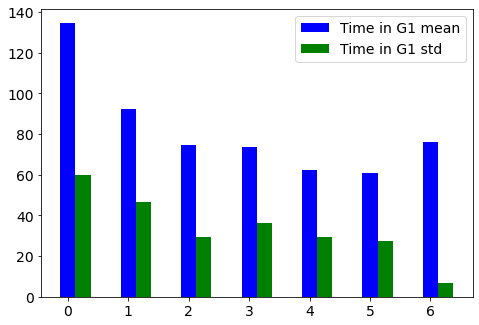

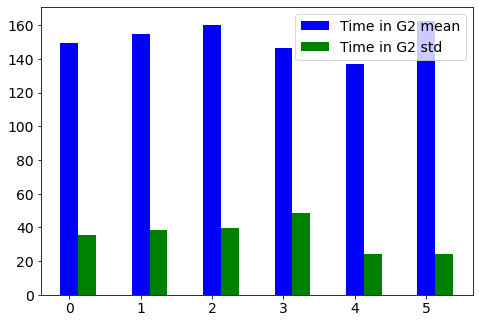

1.489484438603351 0.21115009781488095


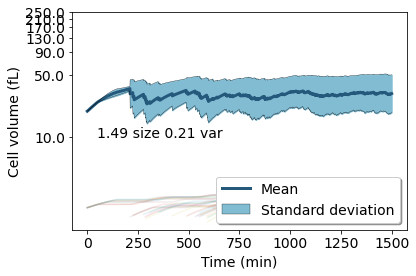

In [147]:
####################
#####main file######
####################


def main():
    date = datetime.today().strftime('%Y-%m-%d')
    hour = str(datetime.now().time().hour)
    minute = str(datetime.now().time().minute)
    second = str(datetime.now().time().second)
    timepoint = date + '-' + hour + '-' + minute + '-' + second
    starttime = time()
    pop = simulation(10,1500)
    stoptime = time()
    print(len(pop))
    print(stoptime-starttime,' s')
    
    save_dir = './MM/%s/' %timepoint
    filename_sim = 'plot'
    #if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
    plot_G1(pop,save_dir)
    plot_G2(pop,save_dir)
    plot_pop_volume_life(pop, 'Time (min)', 'Cell volume (fL)', 'lifecycle_V_'+filename_sim+'.pdf', 1, 10000, save_dir)
    Parallel(n_jobs=-1)(delayed(plot_species)(pop[cell_nr],save_dir,cell_nr) for cell_nr in range(min(len(pop),10)))
    simfile = 'main_model.ipynb'
    save_sim_file(simfile, save_dir)
    
    
def simulation(init_number, duration):
    population = []
    old_daughters = [cell('init_species_cyclins','init_species_growth',duration,0) for i in range(init_number)]
    new_daughters = []
    while old_daughters:
        results = Parallel(n_jobs=-1)(delayed(c.simulate)() for c in old_daughters)
        #results = [old_daughters[0].simulate()]                                    
        population.extend([res[0] for res in results])                                       
        daughters = [res[1] for res in results]
        for d_list in daughters:
            new_daughters.extend(d_list)
        print('collected: ',len(new_daughters))
        old_daughters=new_daughters
        new_daughters=[]
    return population


if __name__=='__main__':
    main()